<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Cai_Nowicki_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [16]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
df = df.drop('Unnamed: 32', axis=1)

In [19]:
df.isnull().sum().any()

False

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [49]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.265378
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.664661
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,0.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


In [0]:
import scipy.stats as stats

In [50]:
stats.ttest_ind(df['perimeter_mean'], df['area_mean'])

Ttest_indResult(statistic=-38.06565827518794, pvalue=4.757672007932309e-205)

In [0]:
columns = df.columns

In [67]:
for i in range(len(columns)-1):
  print(columns[i], columns[i+1])
  x = columns[i]
  y = columns[i + 1]
  print(stats.ttest_ind(df[x],df[y]))
  
#this doesn't test all the columns but at least tests one column against the next to show me where there's likely to be a relationship
  

id radius_mean
Ttest_indResult(statistic=5.794892490537719, pvalue=8.84671102153382e-09)
radius_mean texture_mean
Ttest_indResult(statistic=-22.146222255051075, pvalue=1.2675924841683514e-90)
texture_mean perimeter_mean
Ttest_indResult(statistic=-70.2555022673415, pvalue=0.0)
perimeter_mean area_mean
Ttest_indResult(statistic=-38.06565827518794, pvalue=4.757672007932309e-205)
area_mean smoothness_mean
Ttest_indResult(statistic=44.38367780755177, pvalue=2.3139529247430695e-250)
smoothness_mean compactness_mean
Ttest_indResult(statistic=-3.483217614510205, pvalue=0.0005142788549165893)
compactness_mean concavity_mean
Ttest_indResult(statistic=3.876817212562482, pvalue=0.00011189480587058287)
concavity_mean concave points_mean
Ttest_indResult(statistic=10.729432657579013, pvalue=1.1952993265823378e-25)
concave points_mean symmetry_mean
Ttest_indResult(statistic=-66.39609392668059, pvalue=0.0)
symmetry_mean fractal_dimension_mean
Ttest_indResult(statistic=99.73654446092625, pvalue=0.0)
fra

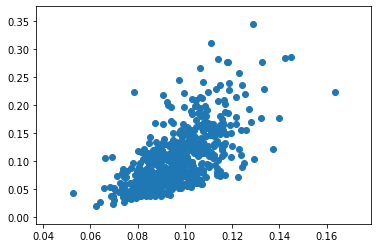

In [69]:
plt.scatter(df['smoothness_mean'], df['compactness_mean']);

In [0]:
new_df = pd.DataFrame()

In [0]:
new_df['x'] = df['smoothness_mean']
new_df['y'] = df['compactness_mean']

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
labels = kmeans.labels_

In [0]:
new_series = pd.Series(labels)
new_df['clusters'] = new_series.values

In [78]:
new_df.head()

,x,y,clusters
0,0.11840,0.27760,2
1,0.08474,0.07864,1
2,0.10960,0.15990,0
3,0.14250,0.28390,2
4,0.10030,0.13280,0


In [0]:
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

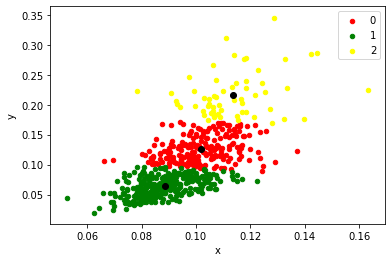

In [82]:
centroids = get_centroids(new_df, 'clusters')
plot_clusters(new_df, 'clusters', centroids)

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_df)
    sum_of_squared_distances.append(km.inertia_)

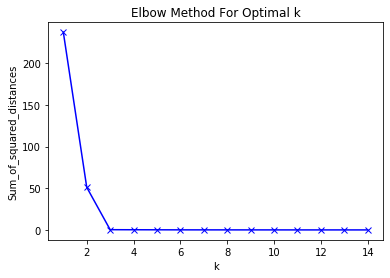

In [105]:

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


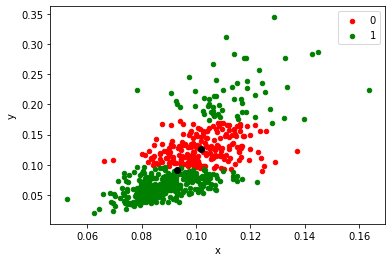

In [125]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_df)
labels = kmeans.labels_

new_series = pd.Series(labels)
new_df['clusters'] = new_series.values

centroids = get_centroids(new_df, 'clusters')
plot_clusters(new_df, 'clusters', centroids)

#well that...isn't very useful

In [113]:
len(df.columns)

32

In [117]:
np.random.choice(32)

19

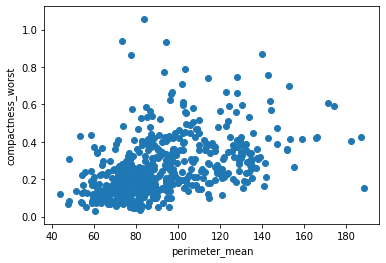

In [185]:
#I'm just going to look at different groups until I find a pairing that looks similar to my PCA data

column_a = df[columns[np.random.choice(32)]]
column_b = df[columns[np.random.choice(32)]]

plt.scatter(column_a, column_b)
plt.xlabel(column_a.name)
plt.ylabel(column_b.name)
plt.show()

In [0]:
new_df['x'] = df[column_a.name]
new_df['y'] = df[column_b.name]

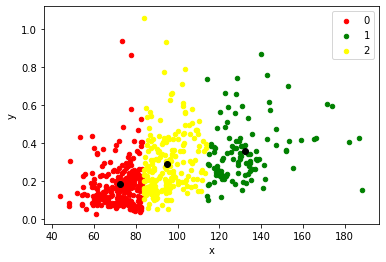

In [187]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
labels = kmeans.labels_

new_series = pd.Series(labels)
new_df['clusters'] = new_series.values

centroids = get_centroids(new_df, 'clusters')
plot_clusters(new_df, 'clusters', centroids)

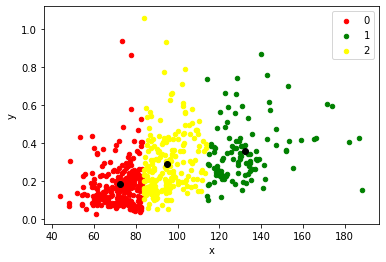

In [188]:
closest_x = 'perimeter_mean'
closest_y = 'compactness_worst'

new_df['x'] = df[closest_x]
new_df['y'] = df[closest_y]

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
labels = kmeans.labels_

new_series = pd.Series(labels)
new_df['clusters'] = new_series.values

centroids = get_centroids(new_df, 'clusters')
plot_clusters(new_df, 'clusters', centroids)

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
mean = df.mean()

In [0]:
centered_data = df - mean

In [0]:
standard_data = centered_data/centered_data.std(ddof=0)

In [0]:
covariance_matrix = np.cov(standard_data.T)

In [0]:

values, vectors = np.linalg.eig(covariance_matrix)

In [0]:
from sklearn.decomposition import PCA


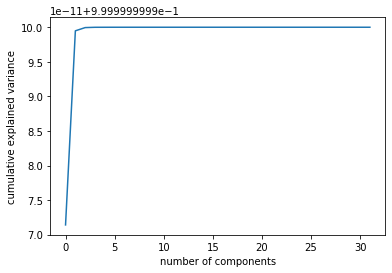

In [42]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#so it looks like 2 or 3 features is all I need to retain most of the variance in this dataset

In [43]:
pca = PCA(n_components=2)
pca.fit(standard_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
df_pca = pca.transform(standard_data)

In [46]:
df_pca

array([[ 9.16855298,  1.99128068],
       [ 2.37335217, -3.73953988],
       [ 5.8074305 , -1.13682962],
       ...,
       [ 1.2422828 , -1.8833782 ],
       [10.35168173,  1.71302435],
       [-5.48619589, -0.66879608]])

In [0]:
df_pca = pd.DataFrame(data=df_pca)

In [0]:
df_pca.columns = ['x', 'y']

In [92]:
df_pca.head()

,x,y
0,9.168553,1.991281
1,2.373352,-3.739540
2,5.807431,-1.136830
3,7.185912,10.210257
4,4.010396,-2.014267


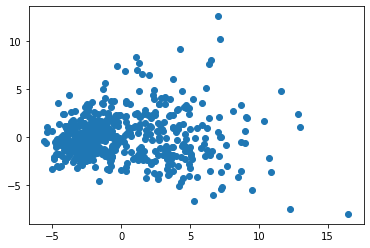

In [93]:
plt.scatter(df_pca['x'], df_pca['y']);

In [0]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)
labels = kmeans.labels_

In [95]:
kmeans.cluster_centers_

array([[ 2.18382232,  3.19769062],
       [-2.36532746, -0.25767282],
       [ 5.06314486, -1.7344508 ]])

In [0]:
new_series = pd.Series(labels)
df_pca['clusters'] = new_series.values


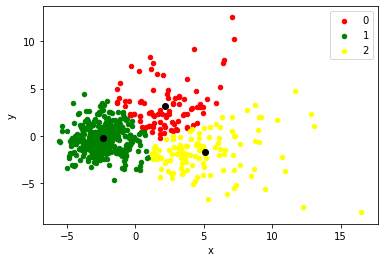

In [101]:
centroids = get_centroids(df_pca, 'clusters')
plot_clusters(df_pca, 'clusters', centroids)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores when preprocessing the data with PCA compare to the accuracy when clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project
- Practice your two-minute presentation for your Data Storytelling Project